In [194]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scratch = os.environ.get("PSCRATCH")+"/xrb_layered/"

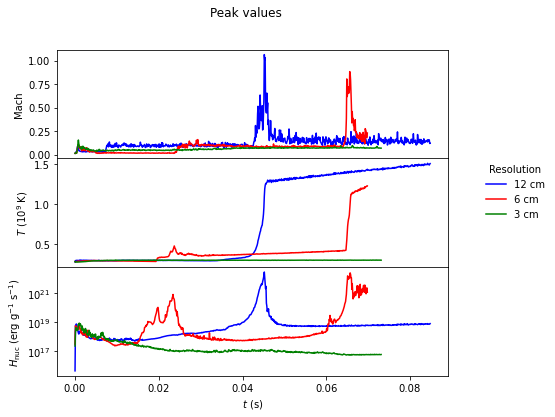

In [223]:
# Extrema

runs = ("RUN3","RUN4","") # files not in run5 yet
labels = ("12 cm","6 cm","3 cm")
colors = ("b","r","g")

fig,axes = plt.subplots(3,1,sharex=True,figsize=(7,6))
fig.suptitle("Peak values")
fig.subplots_adjust(hspace=0)
axes[0].set_ylabel(r"Mach")
axes[1].set_ylabel(r"$T$ ($10^9$ K)")
axes[2].set_ylabel(r"$H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
axes[2].set_xlabel(r"$t$ (s)")

for i,run in enumerate(runs):
    data = np.loadtxt(scratch+run+"/extrema.txt",skiprows=2).T
    t = data[0]
    T_peak = data[2]
    Mach_peak = data[4]
    Hnuc_peak = data[6]

    axes[0].plot(t,Mach_peak, color=colors[i], label=labels[i])
    axes[1].plot(t,T_peak/1e9, color=colors[i])
    axes[2].semilogy(t, Hnuc_peak, color=colors[i])
    
leg = fig.legend(frameon=False, title="Resolution", loc='center right', bbox_to_anchor=(1.01,0.5,0.1,0.1))
fig.savefig("peaks.png", bbox_inches='tight', bbox_extra_artists=(leg,), dpi=500)

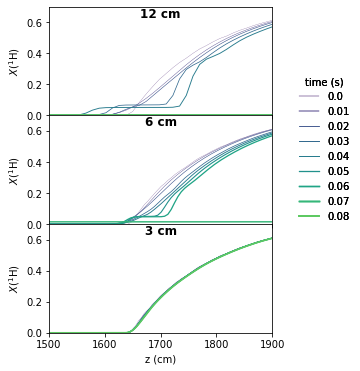

In [224]:
# Averages

fig,axes=plt.subplots(3,1,sharex=True,figsize=(4,6))
fig.subplots_adjust(hspace=0)
for ax in axes:
    ax.set_xlim([1500,1900])
    ax.set_ylim([0,0.7])
    ax.set_ylabel(r"$X(^1\rm{H})$")
axes[-1].set_xlabel(r"z (cm)")

# times to check
tcheck = np.arange(0.00,0.11,0.01)

cmap = sns.color_palette('viridis', len(tcheck))
linewidths = np.linspace(0.2,2,len(tcheck))


for i,run in enumerate(runs):
    # print(run)
    models,times = np.genfromtxt(scratch+run+"/times.txt" ,dtype='unicode', delimiter='    ', unpack=True)
                                 #, converters={0:(lambda x: x.split("/")[-1])}) doesnt work, needs byte-like and not str
    
    # conversion
    models = [m.split("/")[-1] for m in models]
    times  = [float(t) for t in times]
    # print(models)
    # print(times)
    
    for j,t0 in enumerate(tcheck):
        if t0>times[-1]:
            break
            
        # Get averages for model at closest time to check time
        k = np.argmin(abs(times-t0))
        file = scratch+run+"/PLOTS/"+models[k]+"/averages"
        
        try:
            header = np.loadtxt(file, dtype='unicode', max_rows=1)
            data = np.loadtxt(file, skiprows=1).T
        except:
            print("average file not found for plotfile ",file)

        z = data[0]
        # Hnuc = data[list(header).index('Hnuc')]
        h1 = data[list(header).index('X(h1)')]
        
        axes[i].plot(z, h1, '-', color=cmap[j], lw=linewidths[j], label=np.round(t0,decimals=2) if i==0 else None)
        # axb.plot(z,np.log10(Hnuc), color=cmap[j], ls='--')
        
        axes[i].set_title(labels[i], fontweight='bold', y=0.85)
        
        
    leg = fig.legend(title="time (s)", frameon=False, loc='center right', bbox_to_anchor=(1.1,0.5,0.1,0.1))

fig.savefig("h1_layer.png", bbox_inches='tight', bbox_extra_artists=(leg,),  dpi=500)

In [201]:
data = np.loadtxt(scratch+run+"/PLOTS/"+"xrb_0000000/averages", dtype='unicode', max_rows=1)
print(data)
list(data).index('Hnuc')


['height' 'tfromp' 'rho' 'Hnuc' 'ad_excess' 'velx' 'vely' 'X(h1)' 'X(he4)'
 'X(c12)' 'X(fe56)']


3